# Sentiment Analysis

In [1]:
# using Anaconda's base env
# import torch
# import torchtext

In [2]:
# https://www.geeksforgeeks.org/twitter-sentiment-analysis-using-python/

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sentiment_helpers import *


In [3]:
path = "Processed Datasets/"

In [21]:
# update as more files are added

# health orgs

healthorg = pd.read_excel(path + "healthorg.xlsx", index_col=0)
healthorg = sentimentanalysis(healthorg, "tweet")

# left news

leftnews = pd.read_excel(path + "leftnews.xlsx", index_col=0)
leftnews = sentimentanalysis(leftnews, "tweet")

# right news

rightnews = pd.read_excel(path + "rightnews.xlsx", index_col=0)
rightnews = sentimentanalysis(rightnews, "tweet")



In [22]:
# right ind

rightind = pd.read_excel(path + "rightind.xlsx", index_col=0)
rightind = sentimentanalysis(rightind, 'tweet')

# left ind

leftind = pd.read_excel(path + "leftind.xlsx", index_col=0)
leftind = sentimentanalysis(leftind, 'tweet')

# Celebrities

celebrities = pd.read_excel(path + "celebrities.xlsx", index_col=0)
celebrities = sentimentanalysis(celebrities, "tweet")

In [23]:
# fake

fake = pd.read_excel(path + "fake.xlsx", index_col=0)
fake = sentimentanalysis(fake, 'text')

# real

real = pd.read_excel(path + "real.xlsx", index_col=0)
real = sentimentanalysis(real, 'text')

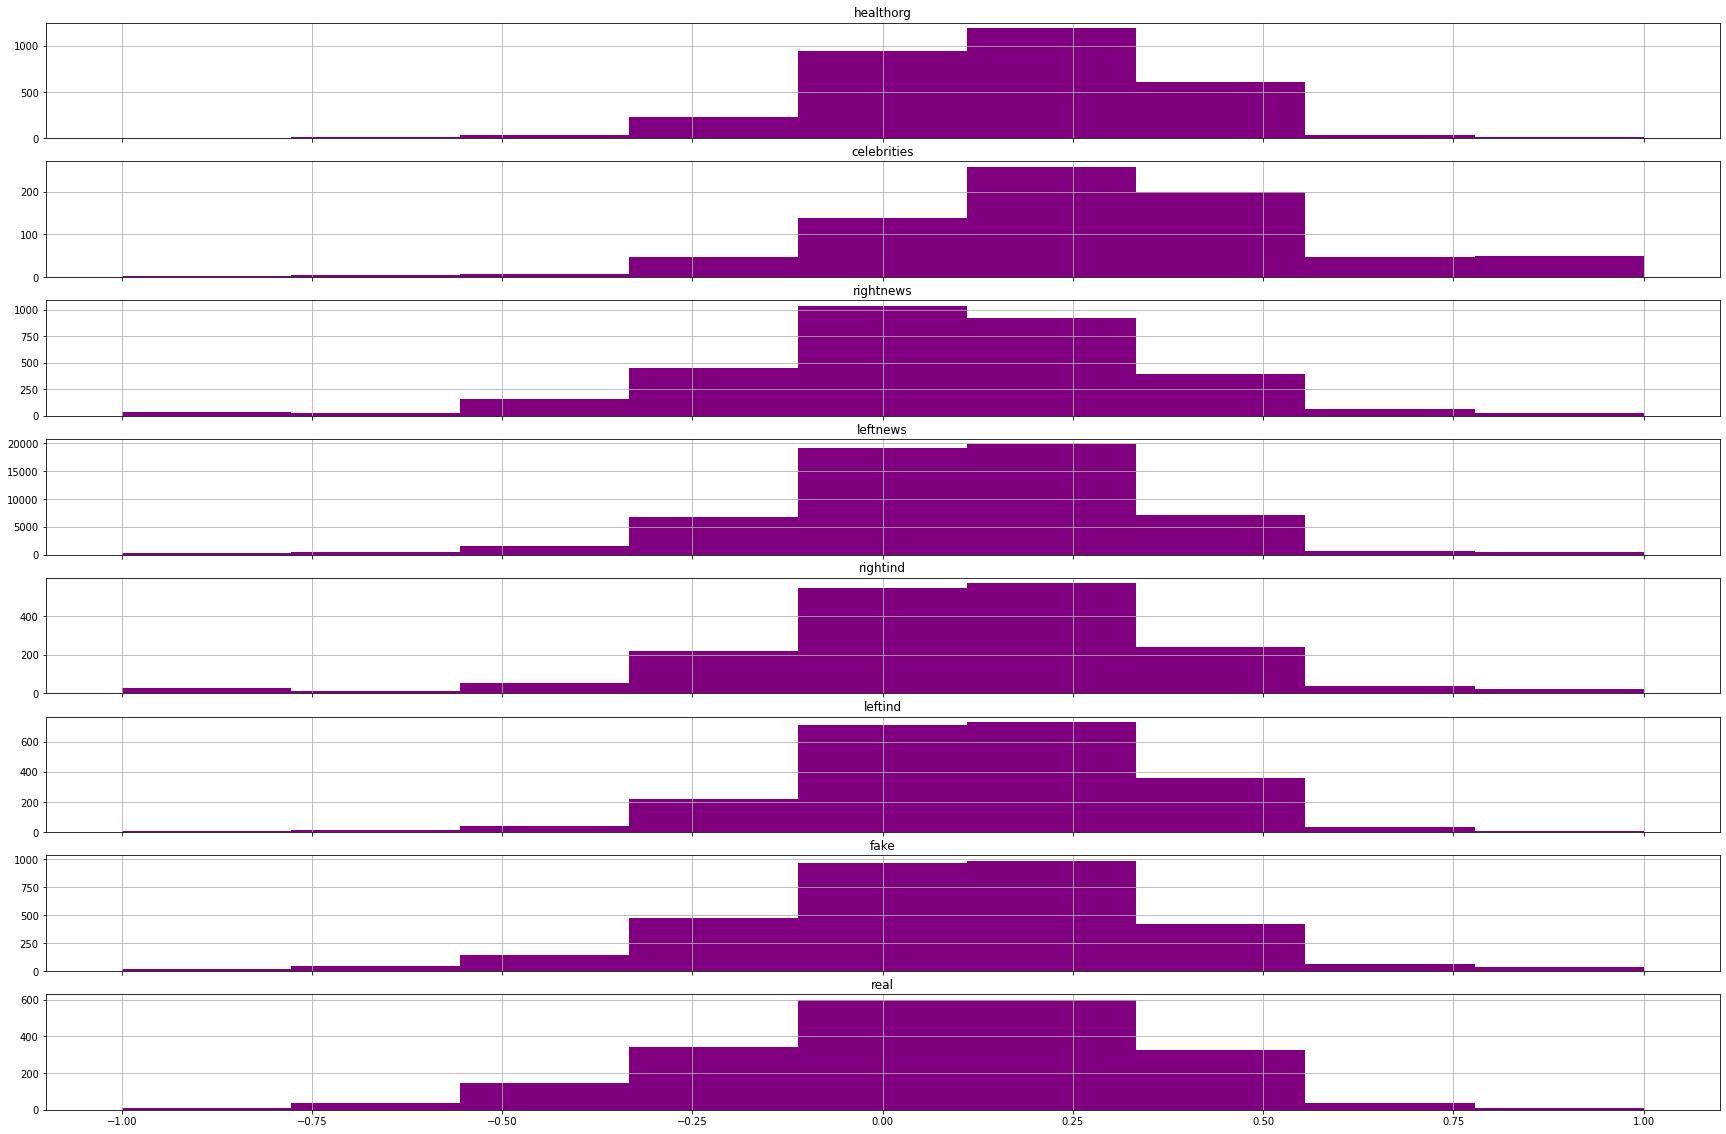

In [24]:
# histogram for overall sentiment

files = [healthorg, celebrities, rightnews, leftnews, rightind, leftind, fake, real]
names = ['healthorg', 'celebrities', 'rightnews', 'leftnews', 'rightind', 'leftind', 'fake', 'real']

fig, axes = plt.subplots(8, 1, figsize=[30, 20], sharex=True)
bins = np.linspace(-1, 1, 10)
for i in range(len(files)):
    col = files[i][files[i].polarity != 0].polarity
    col.hist(bins=bins, ax=axes[i], color="purple")
    axes[i].set_title(names[i])


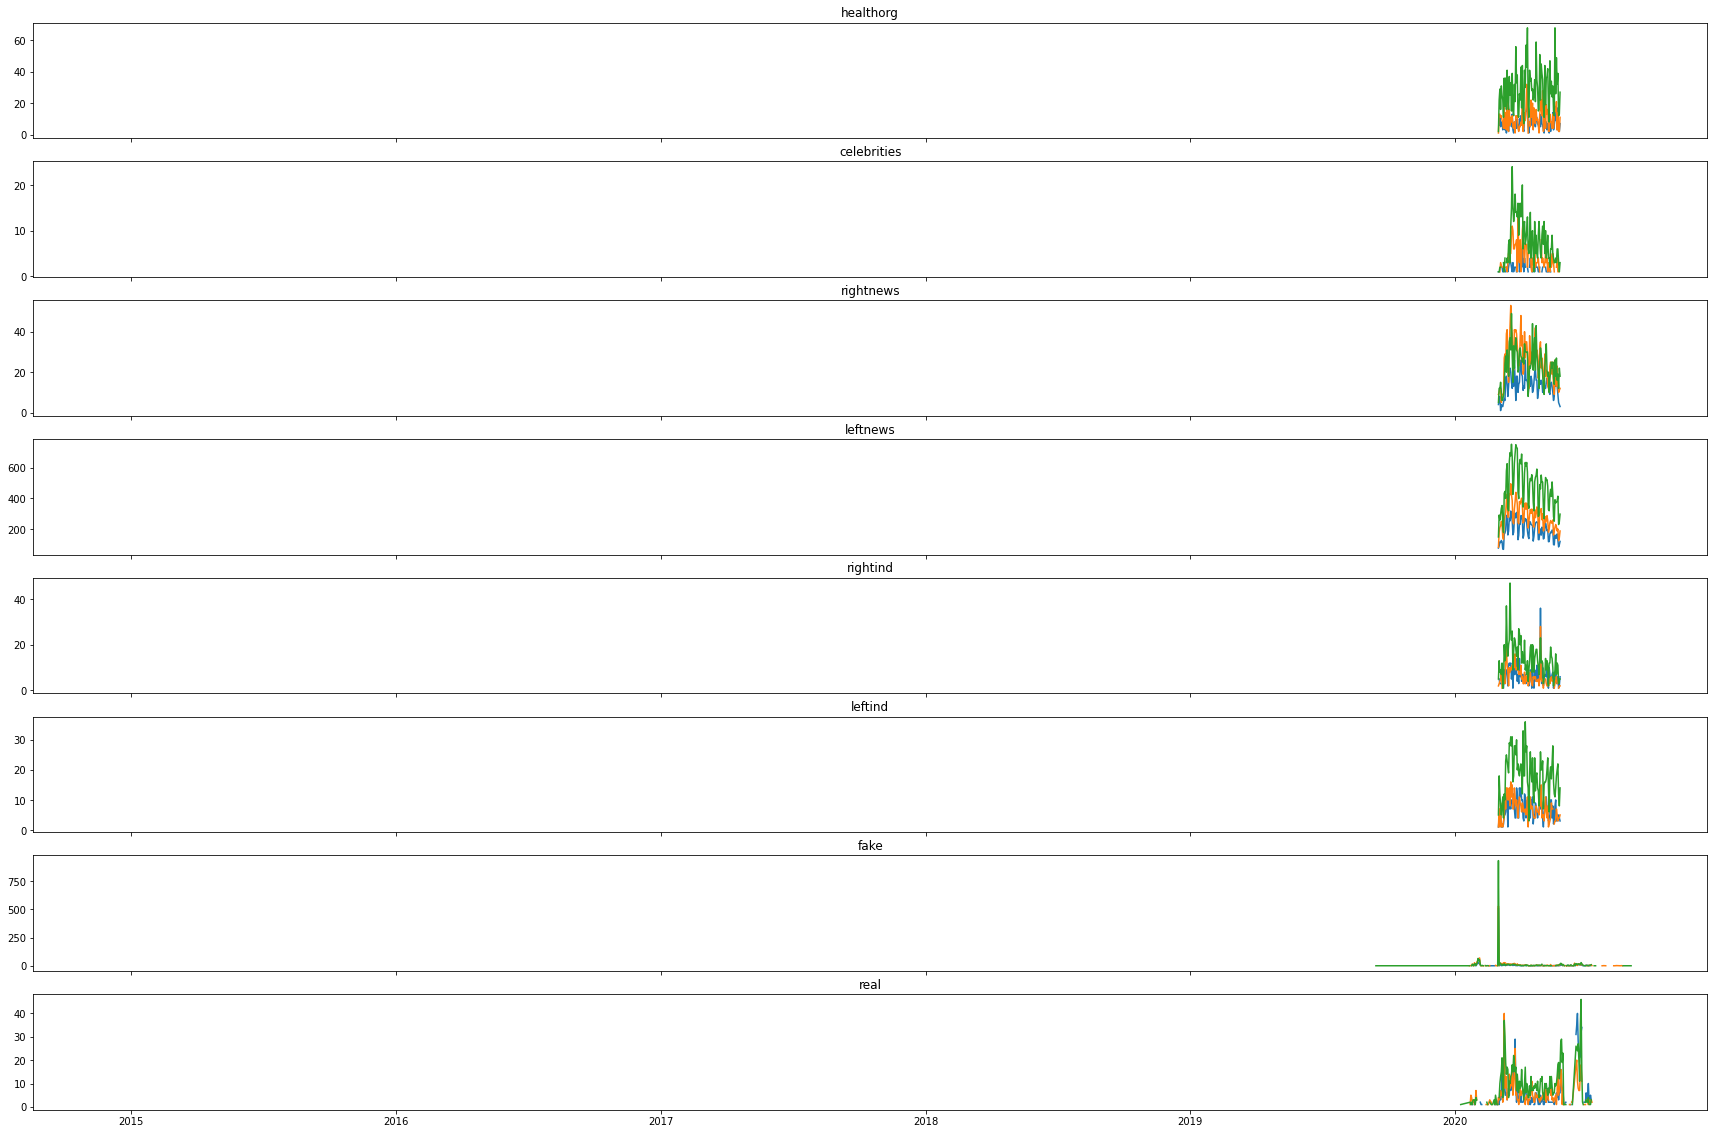

In [25]:
# groupby

fig, axes = plt.subplots(8, 1, figsize=[30, 20], sharex=True)
for i in range(len(files)):
    axes[i].plot(files[i].groupby("date").sentiment.value_counts().unstack(level=1))
    axes[i].set_title(names[i])

In [26]:
# word clouds

for df in files:
    create_wordcloud(df.cleaned_tweet)

NameError: name 'create_wordcloud' is not defined